# How to visualise a tree model - Multiclass Classification


************How to visualise a tree model - Multiclass Classification*************

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

tree.DecisionTreeClassifier(): 

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        17
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
Accuracy: 1.0


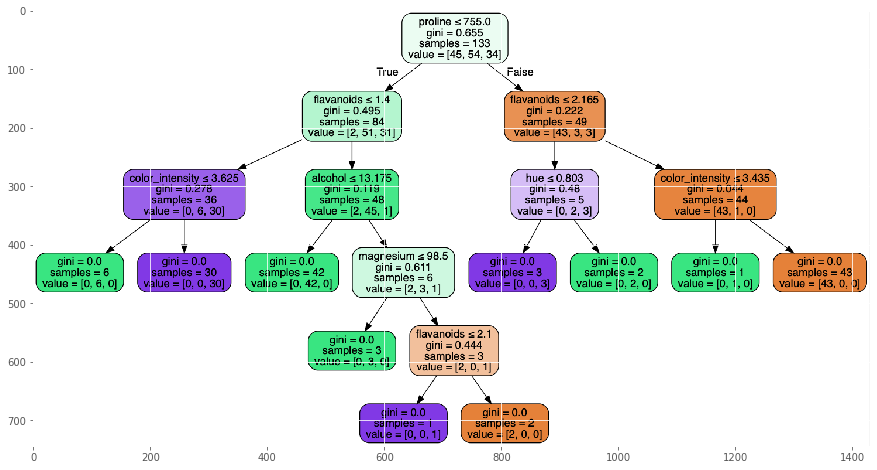

In [20]:
## How to visualise a tree model - Multiclass Classification
## DataSet: skleran.datasets.load_wine()
def Snippet_180(): 
    print()
    print(format('How to visualise a tree model - Multiclass Classification','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries 
    from sklearn import datasets
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')

    from sklearn import tree
    from sklearn.externals.six import StringIO      
    import pydotplus
    
    # load the wine datasets
    dataset = datasets.load_wine()
    X = dataset.data; y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # fit a tree.DecisionTreeClassifier() model to the data
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(); print(model)
    
    # make predictions
    expected_y  = y_test
    predicted_y = model.predict(X_test)
    
    # summarize the fit of the model
    print(); print('tree.DecisionTreeClassifier(): ')
    print(); print(metrics.classification_report(expected_y, predicted_y, 
                   target_names=dataset.target_names))
    print(); print(metrics.confusion_matrix(expected_y, predicted_y))
    
    from sklearn import metrics
    print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y))
    
    # Create a dot file
    dotfile = open("tree.dot", 'w')
    tree.export_graphviz(model, out_file = dotfile, feature_names = dataset.feature_names)
    dotfile.close()        
    
    # Create pdf and png from the dot data
    dot_data = StringIO()
    tree.export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, 
                         special_characters=True, feature_names = dataset.feature_names)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        
    graph.write_png("tree.png")
    graph.write_pdf("tree.pdf")    
    
    
    import matplotlib.image as mpimg    
    img = mpimg.imread('tree.png')    
    #img = misc.imread("tree.png")
    plt.figure(figsize=(15,15)) 
    plt.imshow(img)
    plt.show()
Snippet_180()